# Logistics Regression To Determine Airline Customer Satisfaction

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
airline_df = pd.read_csv('Invistico_Airline.csv')
airline_df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


## EDA

In [3]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [4]:
airline_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Check for missing and duplicate values

In [5]:
airline_df.shape

(129880, 22)

In [6]:
airline_df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
# remove all the missing values
airline_df.dropna(axis=1,inplace=True)

In [8]:
airline_df.duplicated().sum()

0

Visualize the number of customers that were satisfied vs unsatisfied

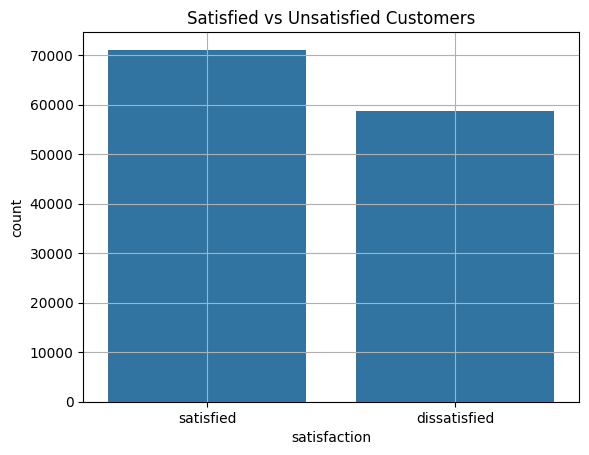

In [9]:
sns.countplot(data=airline_df,x='satisfaction')
plt.title('Satisfied vs Unsatisfied Customers')
plt.grid()
plt.show()

## Data Manipulation

All columns except the <b>satisfaction</b>, <b>Customer Type</b>, <b>Type of Travel</b>, and <b>Class</b> columns are of type int or float. We need to encode these four columns into numerical vavlues that are usefull in modelling. 

In [10]:
airline_df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [11]:
airline_df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [12]:
airline_df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [13]:
airline_df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

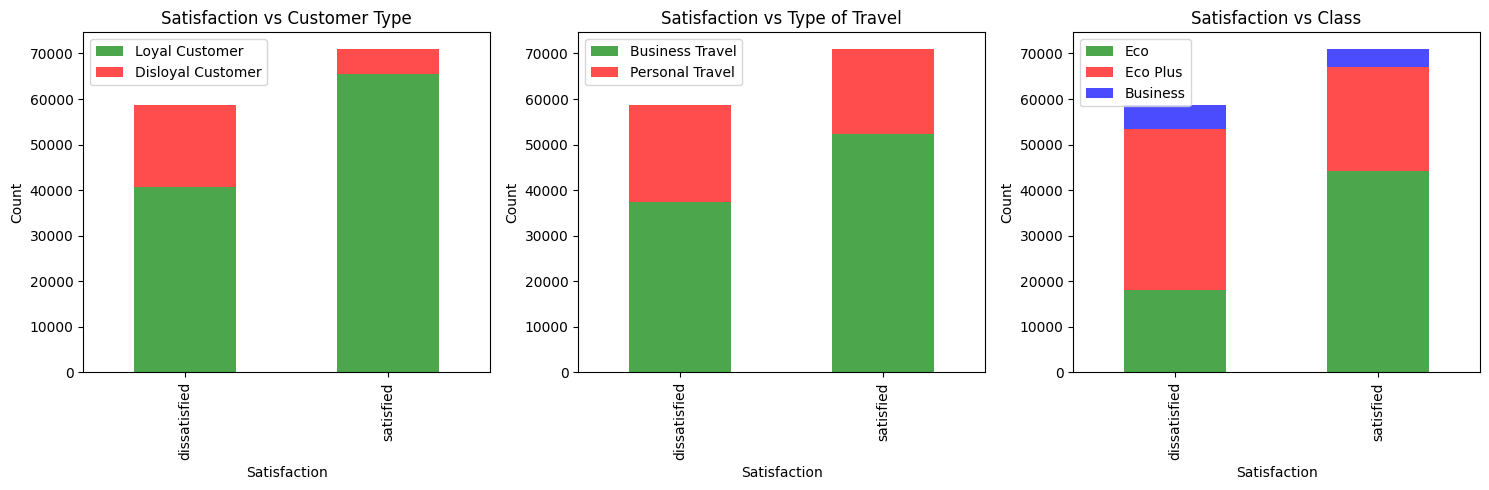

In [14]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# satisfaction vs Customer type
# Create a cross-tabulation (contingency table) of the two columns
cross_table_ctype = pd.crosstab(airline_df['satisfaction'], airline_df['Customer Type'])
ax1 = cross_table_ctype.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7, ax=axes[0])
ax1.set_title('Satisfaction vs Customer Type')
ax1.set_xlabel('Satisfaction')
ax1.set_ylabel('Count')
ax1.legend(['Loyal Customer', 'Disloyal Customer'])

# satisfaction vs Type of travel
cross_table_travel = pd.crosstab(airline_df['satisfaction'], airline_df['Type of Travel'])
ax2 = cross_table_travel.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7, ax=axes[1])
ax2.set_title('Satisfaction vs Type of Travel')
ax2.set_xlabel('Satisfaction')
ax2.set_ylabel('Count')
ax2.legend(['Business Travel', 'Personal Travel'])

# satisfaction vs class
cross_table_class = pd.crosstab(airline_df['satisfaction'], airline_df['Class'])
ax3 = cross_table_class.plot(kind='bar', stacked=True, color=['green', 'red', 'blue'], alpha=0.7, ax=axes[2])
ax3.set_title('Satisfaction vs Class')
ax3.set_xlabel('Satisfaction')
ax3.set_ylabel('Count')
ax3.legend(['Eco', 'Eco Plus', 'Business'])


plt.tight_layout()
plt.show()


We can see the loyalty, travel type and class affect the levels of satisfaction of the passengers. Loyal customers are more satisfied than disloyal customers, while Eco class travellers and Business travellers are more satisfied than their counterparts. 

#### Encoding cartegorical columns

In [15]:
for column in airline_df.columns:
    if airline_df[column].dtype == 'object':
        airline_df[column] = airline_df[column].astype('category')

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
encoder = OrdinalEncoder()
for column in airline_df.columns:
    if airline_df[column].dtype == 'category':
        airline_df[column] = encoder.fit_transform(airline_df[[column]])

airline_df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,1.0,0.0,65,1.0,1.0,265,0,0,0,2,...,4,2,3,3,0,3,5,3,2,0
1,1.0,0.0,47,1.0,0.0,2464,0,0,0,3,...,2,2,3,4,4,4,2,3,2,310
2,1.0,0.0,15,1.0,1.0,2138,0,0,0,3,...,0,2,2,3,3,4,4,4,2,0
3,1.0,0.0,60,1.0,1.0,623,0,0,0,3,...,4,3,1,1,0,1,4,1,3,0
4,1.0,0.0,70,1.0,1.0,354,0,0,0,3,...,3,4,2,2,0,2,4,2,5,0


 #### Check for outliers

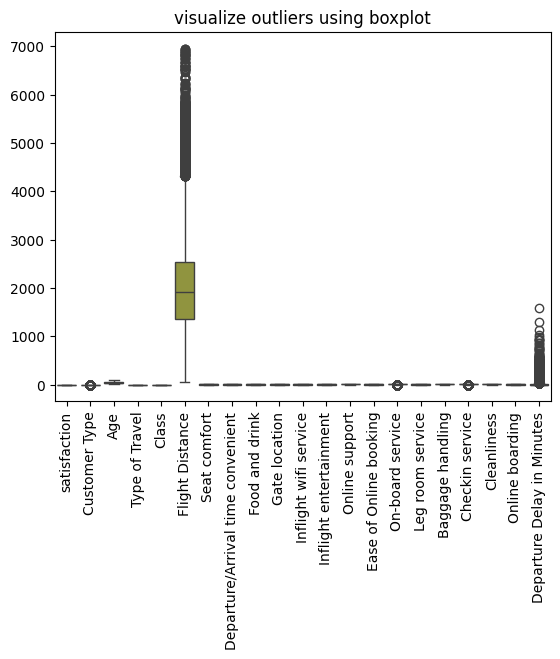

In [18]:
sns.boxplot(data=airline_df)
plt.xticks(rotation=90)
plt.title('visualize outliers using boxplot')
plt.show()

The flight distance and departure delay have the highest number of outliers. We will use the winsorize technique to mitigate the outliers  

In [19]:
from scipy.stats.mstats import winsorize

In [20]:
for column in airline_df.columns:
    airline_df[column] = winsorize(airline_df[column],limits=[0.15,0.15])

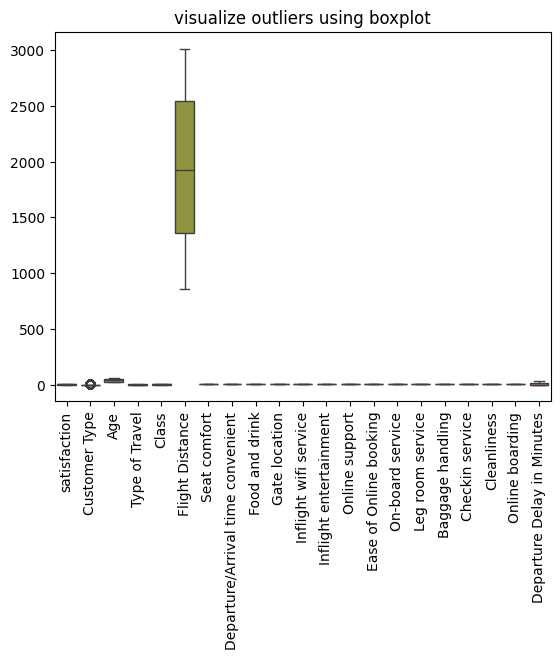

In [21]:
sns.boxplot(data=airline_df)
plt.xticks(rotation=90)
plt.title('visualize outliers using boxplot')
plt.show()

In [22]:
# define independent features
X = airline_df.drop('satisfaction', axis=1)
X

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,0.0,56,1.0,1.0,858,1,1,1,2,2,4,2,3,3,2,3,5,3,2,0
1,0.0,47,1.0,0.0,2464,1,1,1,3,2,2,2,3,4,4,4,2,3,2,28
2,0.0,23,1.0,1.0,2138,1,1,1,3,2,2,2,2,3,3,4,4,4,2,0
3,0.0,56,1.0,1.0,858,1,1,1,3,3,4,3,2,2,2,2,4,2,3,0
4,0.0,56,1.0,1.0,858,1,1,1,3,4,3,4,2,2,2,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,29,1.0,1.0,1731,4,5,5,3,2,5,2,2,3,3,4,4,4,2,0
129876,1.0,56,1.0,0.0,2087,2,3,2,4,2,2,2,3,2,3,3,2,2,2,28
129877,1.0,56,1.0,1.0,2320,3,1,3,3,3,2,2,4,4,3,4,2,3,2,28
129878,1.0,56,1.0,1.0,2450,3,2,3,2,3,2,2,3,3,2,3,2,2,2,28


In [23]:
# define dependent features
y = airline_df['satisfaction']
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
129875    1.0
129876    0.0
129877    0.0
129878    0.0
129879    0.0
Name: satisfaction, Length: 129880, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 33)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#  scale the independent features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

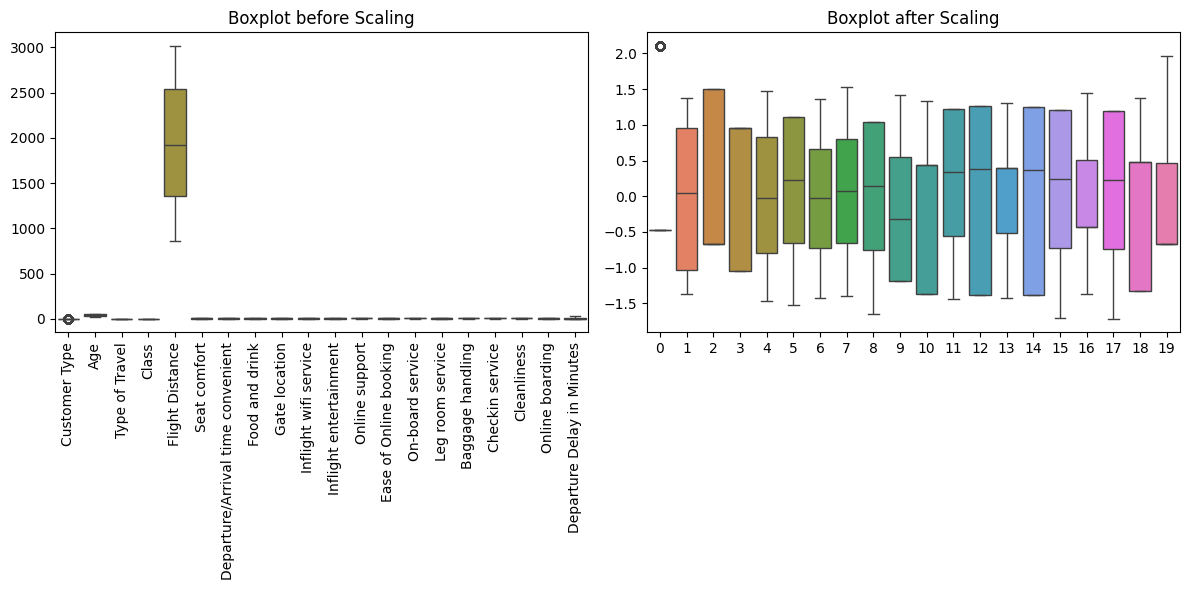

In [28]:

# Plot boxplots for each feature before and after scaling
plt.figure(figsize=(12, 6))

# Boxplot before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.title('Boxplot before Scaling')

# Boxplot after scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Boxplot after Scaling')

plt.tight_layout()
plt.show()


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
LR = LogisticRegression(random_state=33)

In [31]:
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=33)

In [32]:
y_predict = LR.predict(X_test_scaled)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, ConfusionMatrixDisplay, confusion_matrix

In [34]:
Accuracy = accuracy_score(y_test, y_predict)
Precision = precision_score(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

print( {
'Accuracy': Accuracy,
'Precision': Precision,
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE,
})

{'Accuracy': 0.8371317113232728, 'Precision': 0.8552761922732204, 'MAE': 0.16286828867672723, 'MSE': 0.16286828867672723, 'RMSE': 0.40356943476523}


#### confusion matrix

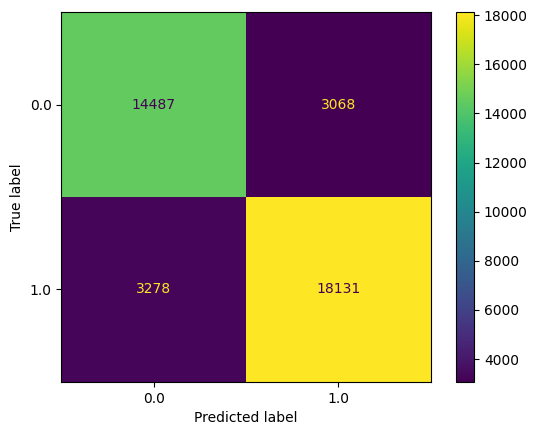

In [35]:
cm = confusion_matrix(y_test, y_predict,labels=LR.classes_)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
matrix.plot()

The accuracy of the model is <b>83.71</b> and the False positive and false negative from the confusion matrix represent a very small percentage of the overall data. The model can be fine tuned using hyper parameter tuning to achieve better results.